Iris数据集的K-means聚类准确率为： 0.4066666666666667
0


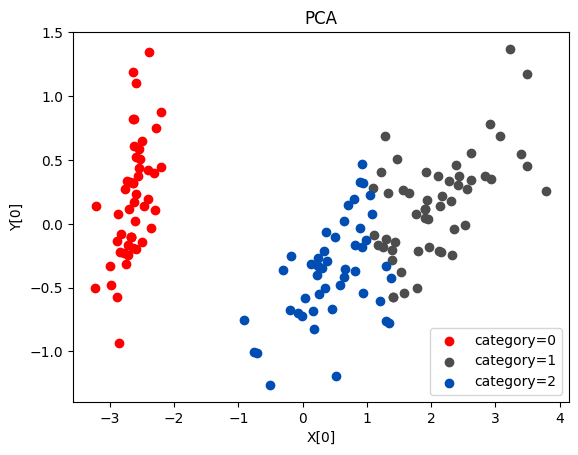

Iris数据集的K-means聚类准确率为： 0.41333333333333333
1


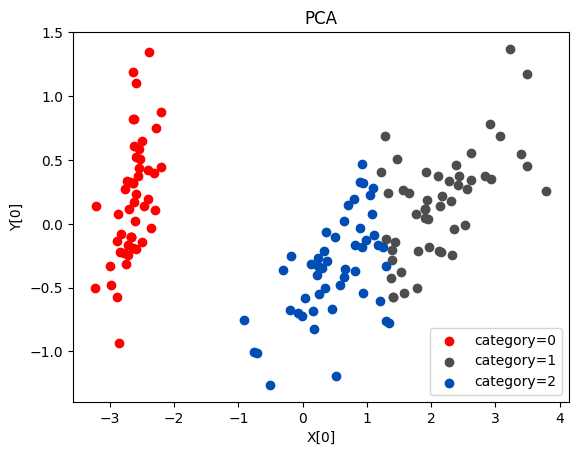

Iris数据集的K-means聚类准确率为： 0.4266666666666667
2


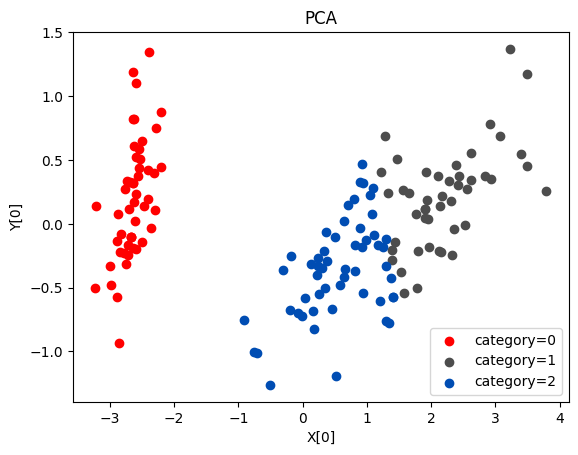

Iris数据集的K-means聚类准确率为： 0.43333333333333335
3


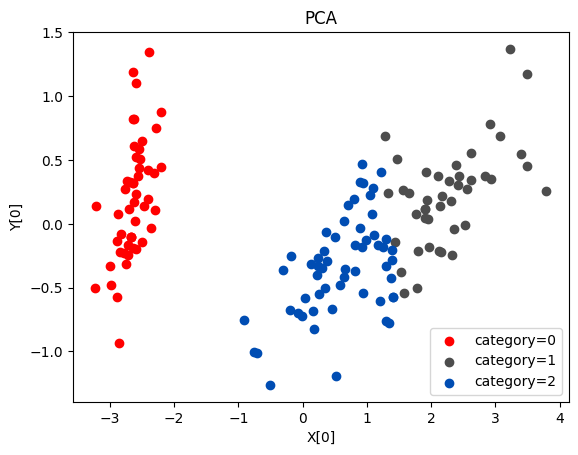

Iris数据集的K-means聚类准确率为： 0.44
4


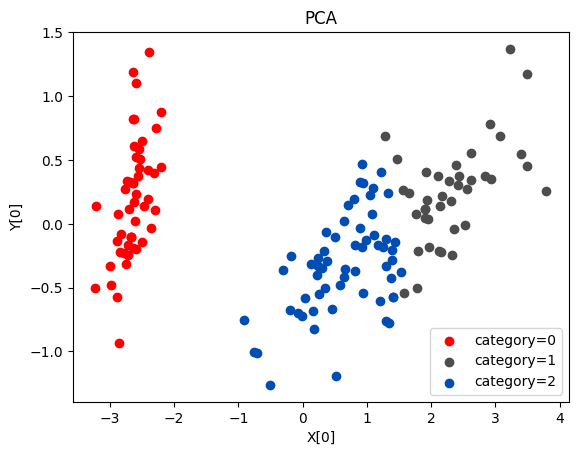

Iris数据集的K-means聚类准确率为： 0.44666666666666666
5


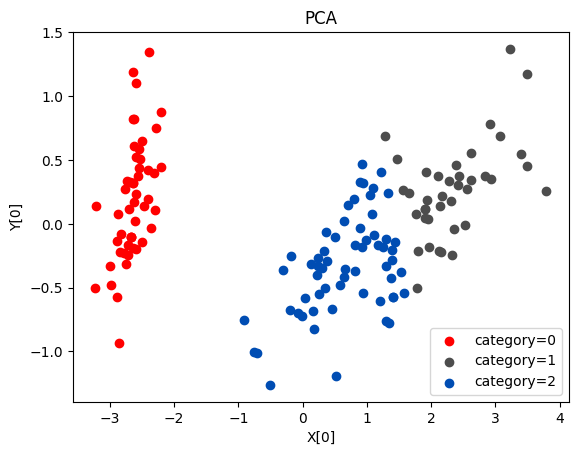

Iris数据集的K-means聚类准确率为： 0.44666666666666666
第一类的聚类样本数为：
50
第二类的聚类样本数为：
39
第三类的聚类样本数为：
61


In [26]:
# -*- coding: utf-8 -*-

#Date: 2023.10.21
#author: KashiwaByte


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets,decomposition,manifold

iris = pd.read_csv('iris.data',header=None,sep=',')
iris1 =iris.iloc[0:150,0:4]
"""
x = iris.iloc[:,0:4]
x = np.mat(x)
a = np.full((50,1),0)
b = np.full((50,1),1)
c = np.full((50,1),2)


d = np.append(a,b,axis=0)
d = np.append(d,c,axis=0)
X = np.append(x,d,axis=1)         # 将数据集中的标签更换为1，2，3
data = np.array(X)
"""
data = np.array(iris1)

k = 3       # k为聚类的类别数
n = 150     # n为样本总个数
d = 4      # t为数据集的特征数

# k-means算法
def k_means():
    accuracy = 0
    # 随机选k个初始聚类中心,聚类中心为每一类的均值向量
    m = np.zeros((k,d))
    for i in range(k):
        m[i] = data[np.random.randint(0,n)]
    
    # k_means聚类
    m_new = m.copy()
    
    t = 0
    while (1):       
        # 更新聚类中心
        m[0] = m_new[0]
        m[1] = m_new[1]
        m[2] = m_new[2]
        
        w1 = np.zeros((1,d))
        w2 = np.zeros((1,d))
        w3 = np.zeros((1,d))

        for i in range(n):
            distance = np.zeros(3)      
            sample = data[i]
    
            for j in range(k):      # 将每一个样本与聚类中心比较
                distance[j] = np.linalg.norm(sample - m[j])
            category = distance.argmin()
            if i<50 and category==0:
                accuracy+=1
            if  50<=i<100 and category==1:
                accuracy+=1
            if  100<=i<150 and category==2:
                accuracy+=1
        
            if category==0:
                w1 = np.row_stack((w1,sample))
            if category==1:
                w2 = np.row_stack((w2,sample))
            if category==2:
                w3 = np.row_stack((w3,sample))
        
        # 新的聚类中心
        Accuracy = accuracy/150
        print(f"Iris数据集的K-means聚类准确率为：",Accuracy)
        w1 = np.delete(w1,0,axis=0)
        w2 = np.delete(w2,0,axis=0)
        w3 = np.delete(w3,0,axis=0)
        m_new[0] = np.mean(w1,axis=0)
        m_new[1] = np.mean(w2,axis=0)
        m_new[2] = np.mean(w3,axis=0)
        accuracy=0
        
        
        # 聚类中心不再改变时，聚类停止
        if (m[0]==m_new[0]).all() and (m[1]==m_new[1]).all() and (m[2]==m_new[2]).all():
            break
        print(t)
        t+=1
        
        #画出每一次迭代的聚类效果图
        w = np.vstack((w1,w2))
        w = np.vstack((w,w3))
        label1 = np.zeros((len(w1),1))
        label2 = np.ones((len(w2),1))
        label3 = np.zeros((len(w3),1))
        for i in range(len(w3)):
            label3[i,0] = 2
        label = np.vstack((label1,label2))
        label = np.vstack((label,label3))
        label = np.ravel(label)
        test_PCA(w,label)
        plot_PCA(w,label)
        
    return w1,w2,w3
    

def test_PCA(*data):
    X,Y=data
    pca=decomposition.PCA(n_components=None)
    pca.fit(X)
 

def plot_PCA(*data):
    X,Y=data
    pca=decomposition.PCA(n_components=2)
    pca.fit(X)
    X_r=pca.transform(X)


    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    colors=((1,0,0),(0.3,0.3,0.3),(0,0.3,0.7),)
    for label,color in zip(np.unique(Y),colors):
        position=Y==label
  #      print(position)
        ax.scatter(X_r[position,0],X_r[position,1],label="category=%d"%label,color=color)
    ax.set_xlabel("X[0]")
    ax.set_ylabel("Y[0]")
    ax.legend(loc="best")
    ax.set_title("PCA")
    plt.show()

if __name__ == '__main__':
    w1,w2,w3 = k_means()
    

    
    
    #print(data[0:97,0:1])
    #print(w1.shape)
    #print(w2.shape)   
    #print(w3.shape)    
    
    print("第一类的聚类样本数为：")
    print(w1.shape[0])
    print("第二类的聚类样本数为：")
    print(w2.shape[0])    
    print("第三类的聚类样本数为：")
    print(w3.shape[0])    

In [12]:
sample = data[81
              ]
print(sample)
print(sample[4])

[5.5 2.4 3.7 1.  1. ]
1.0
